#Covering Numbers

#LEARNING WITH A GENERAL LOSS FUNCTION

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for regression
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 1)  # Feature
Y = 2 * X.squeeze() + np.random.randn(n_samples)  # Target (with noise)

In [ ]:
def custom_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Empirical Risk Minimization

In [ ]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions from the model
Y_pred = model.predict(X)

# Calculate the custom loss (MSE)
risk = custom_loss(Y, Y_pred)
print("Empirical Risk (MSE):", risk)

Empirical Risk (MSE): 1.057171854190629


In [ ]:
from scipy.optimize import minimize

# Define the loss function for optimization (negative of MSE)
def loss_function(theta):
    # Reshape theta to include intercept (theta[0]) and coefficients (theta[1:])
    theta = theta.reshape(-1, 1)  # Reshape theta to a column vector
    intercept = theta[0]
    coefficients = theta[1:]

    # Calculate predicted values
    y_pred = np.dot(X, coefficients) + intercept

    # Calculate negative of MSE (to be minimized)
    return -np.mean((Y - y_pred) ** 2)

# Initial guess for parameters (coefficients of linear regression)
initial_theta = np.random.randn(X.shape[1] + 1)

# Minimize the loss function using scipy's minimize
result = minimize(loss_function, initial_theta)
optimal_theta = result.x

# Print the optimal parameters
print("Optimal Theta:", optimal_theta)

Optimal Theta: [820.54662547 631.65371675]


Optimal Theta: [2.01628968e-01 9.67503127e-09]


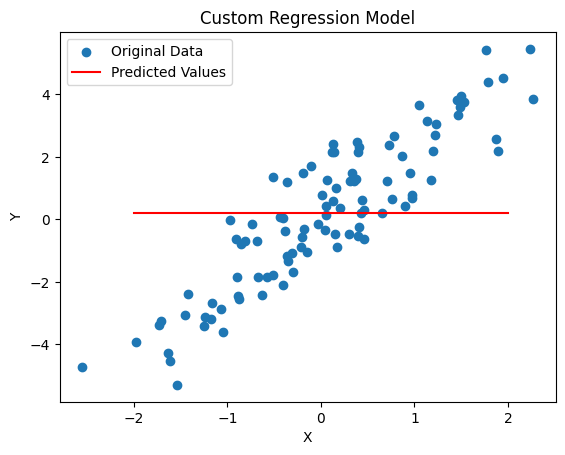

In [ ]:
import numpy as np
from scipy.optimize import minimize

class CustomRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, Y):
        def loss_function(theta):
            # Reshape theta to include intercept (theta[0]) and coefficients (theta[1:])
            theta = theta.reshape(-1, 1)
            intercept = theta[0]
            coefficients = theta[1:]

            # Calculate predicted values
            y_pred = np.dot(X, coefficients) + intercept

            # Calculate negative of MSE (to be minimized)
            return np.mean((Y - y_pred) ** 2)

        # Initial guess for parameters (coefficients of linear regression)
        initial_theta = np.random.randn(X.shape[1] + 1)

        # Minimize the loss function using scipy's minimize
        result = minimize(loss_function, initial_theta)
        self.theta = result.x

    def predict(self, X):
        if self.theta is None:
            raise Exception("Model not trained. Call fit() first.")

        # Reshape theta to include intercept (self.theta[0]) and coefficients (self.theta[1:])
        theta = self.theta.reshape(-1, 1)
        intercept = theta[0]
        coefficients = theta[1:]

        # Make predictions using the fitted model
        y_pred = np.dot(X, coefficients) + intercept
        return y_pred

# Generate synthetic data for regression
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 1)  # Feature
Y = 2 * X.squeeze() + np.random.randn(n_samples)  # Target (with noise)

# Instantiate CustomRegression model
model = CustomRegression()

# Fit the model to the data
model.fit(X, Y)

# Make predictions using the fitted model
X_test = np.linspace(-2, 2, 50).reshape(-1, 1)  # Generate test data
Y_pred = model.predict(X_test)

# Print the optimal parameters
print("Optimal Theta:", model.theta)

# Plot the original data and predicted values
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Original Data')
plt.plot(X_test, Y_pred, color='red', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Custom Regression Model')
plt.legend()
plt.show()

#Empirical Risk Minimization:
1. Notations
2. Symmetrization and Rademacher Complexity   
3. Finite Class of function

In [ ]:
import numpy as np

# Define a simple class of functions (for demonstration)
class FiniteFunctionClass:
    def __init__(self, functions):
        self.functions = functions

    def evaluate(self, X):
        # Evaluate all functions in the class on input X
        return np.array([[func(x) for func in self.functions] for x in X])

# Generate some synthetic data
def generate_data(n, d):
    X = np.random.randn(n, d)  # n samples, d-dimensional features
    y = np.random.choice([-1, 1], size=n)  # binary labels {-1, 1}
    return X, y

# Define empirical risk minimization (ERM)
def empirical_risk_minimization(X, y, function_class):
    n = X.shape[0]
    d = len(function_class.functions)  # Number of functions in the class

    def empirical_risk(weights):
        # Calculate empirical risk given weights
        predictions = function_class.evaluate(X)  # Shape: (n, d)
        weighted_predictions = predictions.dot(weights)  # Shape: (n,)
        hinge_loss = np.maximum(0, -y * weighted_predictions)
        return np.mean(hinge_loss)

    return empirical_risk

# Example usage
if __name__ == "__main__":
    # Define a simple class of functions (for demonstration)
    functions = [
        lambda x: np.dot(x, [1, 2]),  # Function 1
        lambda x: np.dot(x, [-1, 3]),  # Function 2
    ]

    function_class = FiniteFunctionClass(functions)

    # Generate synthetic data
    X, y = generate_data(100, 2)

    # Empirical Risk Minimization (ERM)
    weights = np.random.randn(len(functions))
    erm_loss = empirical_risk_minimization(X, y, function_class)(weights)
    print("Empirical Risk:", erm_loss)


Empirical Risk: 0.48169512812088916


In [ ]:
import numpy as np

# Define a simple class of functions (for demonstration)
class FiniteFunctionClass:
    def __init__(self, functions):
        self.functions = functions

    def evaluate(self, X):
        # Evaluate all functions in the class on input X
        return np.array([[func(x) for func in self.functions] for x in X])

# Generate some synthetic data
def generate_data(n, d):
    X = np.random.randn(n, d)  # n samples, d-dimensional features
    y = np.random.choice([-1, 1], size=n)  # binary labels {-1, 1}
    return X, y

# Define empirical risk minimization (ERM)
def empirical_risk_minimization(X, y, function_class):
    n = X.shape[0]
    d = len(function_class.functions)  # Number of functions in the class

    def empirical_risk(weights):
        # Calculate empirical risk given weights
        predictions = function_class.evaluate(X)  # Shape: (n, d)
        weighted_predictions = predictions.dot(weights)  # Shape: (n,)
        hinge_loss = np.maximum(0, -y * weighted_predictions)
        return np.mean(hinge_loss)

    return empirical_risk

# Symmetrization inequality
def symmetrization_inequality(function_class, X):
    n = X.shape[0]
    d = len(function_class.functions)  # Number of functions in the class

    # Sample random signs
    signs = np.random.choice([-1, 1], size=(n, d))

    def symmetrized_function(weights):
        # Evaluate all functions with random signs
        signed_evaluations = signs * function_class.evaluate(X)

        # Compute the mean over functions and samples
        return np.mean(np.sum(signed_evaluations * weights, axis=1))

    return symmetrized_function

# Rademacher complexity for a given class
def rademacher_complexity(function_class, X):
    n = X.shape[0]
    d = len(function_class.functions)  # Number of functions in the class

    # Generate Rademacher random variables
    rads = np.random.choice([-1, 1], size=(n, d))

    def rademacher_term(weights):
        # Evaluate all functions with Rademacher random variables
        rad_evaluations = rads * function_class.evaluate(X)

        # Compute the mean over functions and samples
        return np.mean(np.sum(rad_evaluations * weights, axis=1))

    return rademacher_term

# Example usage
if __name__ == "__main__":
    # Define a simple class of functions (for demonstration)
    functions = [
        lambda x: np.dot(x, [1, 2]),  # Function 1
        lambda x: np.dot(x, [-1, 3]),  # Function 2
    ]

    function_class = FiniteFunctionClass(functions)

    # Generate synthetic data
    n_samples = 100
    X, y = generate_data(n_samples, 2)

    # Empirical Risk Minimization (ERM)
    weights = np.random.randn(len(functions))
    erm_loss = empirical_risk_minimization(X, y, function_class)(weights)
    print("Empirical Risk:", erm_loss)

    # Symmetrization Inequality
    symmetrized_fn = symmetrization_inequality(function_class, X)
    sym_value = symmetrized_fn(weights)
    print("Symmetrization Inequality:", sym_value)

    # Rademacher Complexity
    rad_complexity_fn = rademacher_complexity(function_class, X)
    rad_value = rad_complexity_fn(weights)
    print("Rademacher Complexity:", rad_value)

Empirical Risk: 0.3494846211370652
Symmetrization Inequality: -0.008001394421467436
Rademacher Complexity: 0.01188453002430267


#The General Case
1. Covering Numbers
2.  Computing Covering Numbers

In [ ]:
import itertools

def covering_number(epsilon, X, distance_metric):
    """
    Compute the covering number N(epsilon, X, distance_metric) for a given set X
    and a distance metric.

    Parameters:
    epsilon (float): Radius of the epsilon-ball.
    X (list or numpy array): Set X.
    distance_metric (function): Distance metric function that takes two points
                                and returns the distance between them.

    Returns:
    int: Covering number N(epsilon, X, distance_metric).
    """
    n = len(X)
    if n == 0:
        return 0

    covering_set = set()

    # Generate all combinations of points in X
    for subset in itertools.combinations(X, 2):
        p1, p2 = subset
        dist = distance_metric(p1, p2)
        if dist >= epsilon:
            covering_set.add(p1)
            covering_set.add(p2)

    return len(covering_set)

# Example distance metric (Euclidean distance)
def euclidean_distance(x, y):
    return sum((xi - yi) ** 2 for xi, yi in zip(x, y)) ** 0.5

# Example usage:
if __name__ == "__main__":
    # Example set X (list of points in a metric space)
    X = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

    # Compute covering number with epsilon = 3.0 and Euclidean distance
    epsilon = 3.0
    num_covers = covering_number(epsilon, X, euclidean_distance)

    print(f"Covering number for epsilon = {epsilon}: {num_covers}")


Covering number for epsilon = 3.0: 5


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def generate_dataset(num_samples, num_features):
    """ Generate synthetic dataset with random features and covering numbers """
    X = np.random.rand(num_samples, num_features)  # Random features
    y = np.random.randint(1, 10, size=num_samples)  # Random covering numbers
    return X, y

# Generate synthetic dataset
num_samples = 1000
num_features = 5
X, y = generate_dataset(num_samples, num_features)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree regressor model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction using new data point
new_data_point = np.random.rand(1, num_features)  # Generate a new data point
predicted_covering_number = model.predict(new_data_point)
print(f"Predicted Covering Number: {predicted_covering_number[0]}")

Mean Squared Error: 12.575
Predicted Covering Number: 9.0
